=== Linear Regression for Housing Price Prediction ===
Mean Squared Error: 2273285714.58
R² Score: 0.78
Coefficients: [ 75387.11121454  27526.34056548 -47878.89138201]
Intercept: 356098.1379962231


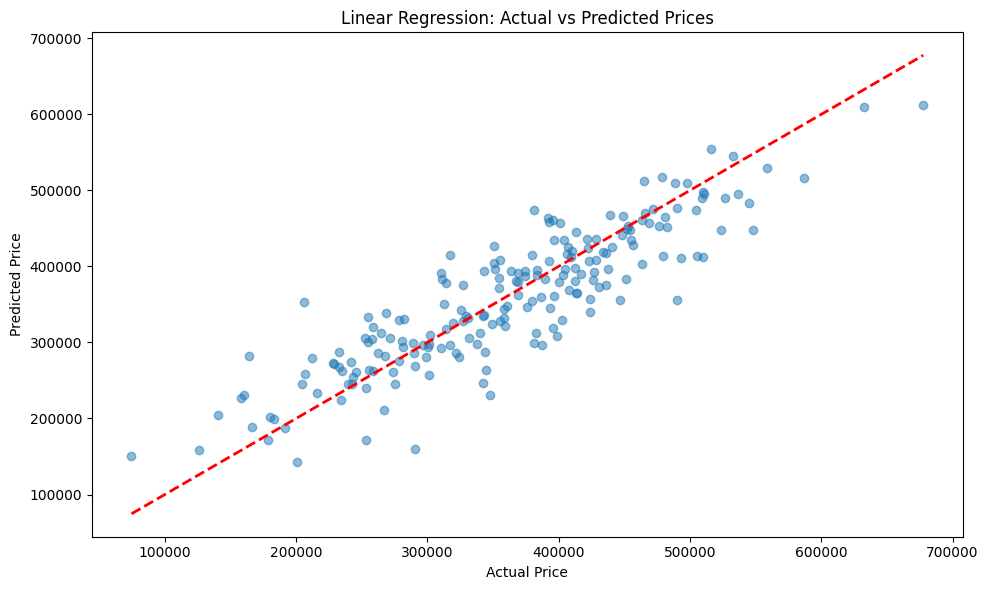


Linear regression plot displayed above and saved as 'linear_regression_plot.png'


In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic housing data
n_samples = 1000
size = np.random.normal(2000, 500, n_samples)  # House size in sq ft
bedrooms = np.random.randint(1, 6, n_samples)  # Number of bedrooms
age = np.random.normal(20, 10, n_samples)     # Age of house in years
price = 100000 + 150 * size + 20000 * bedrooms - 5000 * age + np.random.normal(0, 50000, n_samples)

# Create DataFrame
data = pd.DataFrame({
    'size': size,
    'bedrooms': bedrooms,
    'age': age,
    'price': price
})

# Linear Regression Model
print("=== Linear Regression for Housing Price Prediction ===")

# Features and target
X = data[['size', 'bedrooms', 'age']]
y = data['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = lin_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print("Coefficients:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.tight_layout()
plt.savefig('linear_regression_plot.png')
plt.show()  # Display plot inline in Colab
plt.close()

print("\nLinear regression plot displayed above and saved as 'linear_regression_plot.png'")